# Shapeの整形

## 市区町村リストの取得

In [4]:
import json
import pandas as pd

with open('cityList.json', 'r', encoding='utf-8') as file:
    cities = json.load(file)

df_cities = pd.DataFrame(cities)
df_cities

,prefCode,cityCode,cityName,bigCityFlag,prefName
0,01000,01100,札幌市,2,北海道
1,01000,01101,札幌市中央区,1,北海道
2,01000,01102,札幌市北区,1,北海道
3,01000,01103,札幌市東区,1,北海道
4,01000,01104,札幌市白石区,1,北海道
...,...,...,...,...,...
1917,47000,47361,久米島町,0,沖縄県
1918,47000,47362,八重瀬町,0,沖縄県
1919,47000,47375,多良間村,0,沖縄県
1920,47000,47381,竹富町,0,沖縄県


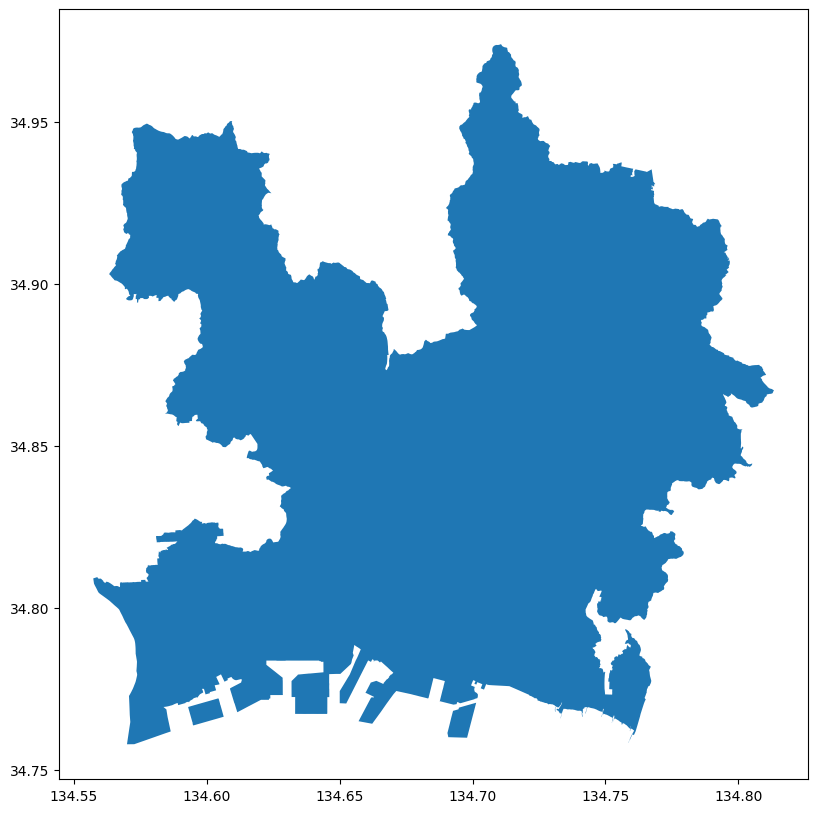

,tokeiname,Type,kubunID,Pref,Citycode,Cityname,当初決定日,最終告示日,決定区分,決定者,告示番号S,告示番号L
0,中播都市計画区域,都市計画区域,21,兵庫県,28201,姫路市,NaN,昭和46年3月16日,None,None,NaN,兵庫県告示第361号の3
1,中播都市計画区域,都市計画区域,21,兵庫県,28201,姫路市,NaN,昭和46年3月16日,None,None,NaN,兵庫県告示第361号の3
2,中播都市計画区域,都市計画区域,21,兵庫県,28201,姫路市,NaN,昭和46年3月16日,None,None,NaN,兵庫県告示第361号の3


In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# shapeファイルのパスを指定
shapefile_path = './shape/28_兵庫県/28201_姫路市/28201_tokei.shp'

# GeoDataFrameを表示
gdf = gpd.read_file(shapefile_path)
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)
plt.show()

# 属性情報をDataFrameとして取得（ジオメトリ列を除く）
attr_df = pd.DataFrame(gdf.drop(columns='geometry'))
display(attr_df)



## shapeファイルの結合

### 兵庫県で試行

In [8]:
import os

def find_shapefiles(root_dir, suffix="_tokei", file_ext=".shp"):
    file_list = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(file_ext) and suffix in file:
                file_list.append(os.path.join(root, file))
    return file_list


root_directory = "./shape/28_兵庫県"
suffix = "_tokei"
file_list = find_shapefiles(root_directory, suffix)
print(file_list)

['./shape/28_兵庫県/28222_養父市/28222_tokei.shp', './shape/28_兵庫県/28224_南あわじ市/28224_tokei.shp', './shape/28_兵庫県/28212_赤穂市/28212_tokei.shp', './shape/28_兵庫県/28381_稲美町/28381_tokei.shp', './shape/28_兵庫県/28481_上郡町/28481_tokei.shp', './shape/28_兵庫県/28585_香美町/28585_tokei.shp', './shape/28_兵庫県/28225_朝来市/28225_tokei.shp', './shape/28_兵庫県/28210_加古川市/28210_tokei.shp', './shape/28_兵庫県/28223_丹波市/28223_tokei.shp', './shape/28_兵庫県/28213_西脇市/28213_tokei.shp', './shape/28_兵庫県/28443_福崎町/28443_tokei.shp', './shape/28_兵庫県/28221_丹波篠山市/28221_tokei.shp', './shape/28_兵庫県/28208_相生市/28208_tokei.shp', './shape/28_兵庫県/28219_三田市/28219_tokei.shp', './shape/28_兵庫県/28220_加西市/28220_tokei.shp', './shape/28_兵庫県/28209_豊岡市/28209_tokei.shp', './shape/28_兵庫県/28382_播磨町/28382_tokei.shp', './shape/28_兵庫県/28207_伊丹市/28207_tokei.shp', './shape/28_兵庫県/28501_佐用町/28501_tokei.shp', './shape/28_兵庫県/28227_宍粟市/28227_tokei.shp', './shape/28_兵庫県/28203_明石市/28203_tokei.shp', './shape/28_兵庫県/28206_芦屋市/28206_tokei.shp', './shape/28_兵庫県/28218_小野市/

全市区町村のshapeファイルを結合する。

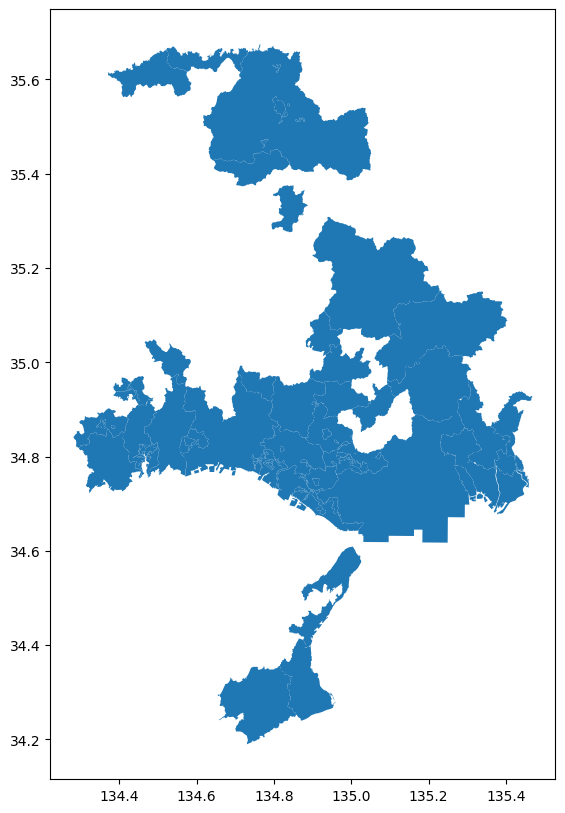

,tokeiname,Type,kubunID,Pref,Citycode,Cityname,当初決定日,最終告示日,決定区分,決定者,告示番号S,告示番号L
0,None,都市計画区域,21,兵庫県,28222,養父市,NaN,None,None,None,NaN,None
1,None,都市計画区域,21,兵庫県,28224,南あわじ市,NaN,None,None,None,NaN,None
2,都市計画区域,都市計画区域,21,兵庫県,28212,赤穂市,NaN,None,None,None,NaN,None
3,None,都市計画区域,21,兵庫県,28381,稲美町,NaN,None,None,None,NaN,None
4,None,都市計画区域,21,兵庫県,28381,稲美町,NaN,None,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
125,都市計画区域,都市計画区域,21,兵庫県,28228,加東市,NaN,None,None,None,NaN,None
126,都市計画区域,都市計画区域,21,兵庫県,28228,加東市,NaN,None,None,None,NaN,None
127,None,都市計画区域,21,兵庫県,28229,たつの市,NaN,None,None,None,NaN,None
128,None,都市計画区域,21,兵庫県,28229,たつの市,NaN,None,None,None,NaN,None


In [13]:
import geopandas as gpd
import pandas as pd


# shapeファイルを結合    
gdfs = []
for file in file_list:
    gdf = gpd.read_file(file, encoding='shift-jis')
    gdfs.append(gdf)

merged_gdf = pd.concat(gdfs, ignore_index=True)
    
# GeoDataFrameを表示
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf .plot(ax=ax)
plt.show()

# 属性情報をDataFrameとして取得（ジオメトリ列を除く）
attr_df = pd.DataFrame(merged_gdf.drop(columns='geometry'))
display(attr_df)


### 属性情報を加工

In [22]:

def merge_shapefiles (file_list):
    gdfs = []
    for file in file_list:
        gdf = gpd.read_file(file, encoding="shift-jis")
        gdfs.append(gdf)

    merged_gdf = pd.concat(gdfs, ignore_index=True)

    # 必要な属性情報のみ取得して名称を変更
    merged_gdf = merged_gdf[["Type", "Citycode", "geometry"]]
    merged_gdf = merged_gdf.rename(columns={"Type": "名称", "Citycode": "cityCode"})

    # 市区町村リストをマージ
    merged_gdf = merged_gdf.merge(df_cities, on="cityCode", how="left")

    return merged_gdf

merged_gdf = merge_shapefiles(file_list)
# 表示
attr_df = pd.DataFrame(merged_gdf.drop(columns="geometry"))
display(attr_df)

,名称,cityCode,prefCode,cityName,bigCityFlag,prefName
0,都市計画区域,28222,28000,養父市,0,兵庫県
1,都市計画区域,28224,28000,南あわじ市,0,兵庫県
2,都市計画区域,28212,28000,赤穂市,0,兵庫県
3,都市計画区域,28381,28000,稲美町,0,兵庫県
4,都市計画区域,28381,28000,稲美町,0,兵庫県
...,...,...,...,...,...,...
125,都市計画区域,28228,28000,加東市,0,兵庫県
126,都市計画区域,28228,28000,加東市,0,兵庫県
127,都市計画区域,28229,28000,たつの市,0,兵庫県
128,都市計画区域,28229,28000,たつの市,0,兵庫県


# GeoJsonに変換して保存

In [25]:
output_dir = './geojson/28000'
os.makedirs(output_dir, exist_ok=True)

# GeoJSONとして保存
merged_gdf.to_file('./geojson/28000/tokei.geojson', driver='GeoJSON')



# TopoJsonに変換して保存

In [26]:
import subprocess
input_geojson = "./geojson/28000/tokei.geojson"
output_topojson = "./topojson/28000/tokei.topojson"

# mapshaper-npmを使用してGeoJSONをTopoJSONに変換
command = f"mapshaper {input_geojson} -o format=topojson {output_topojson}"
result = subprocess.run(command, shell=True, capture_output=True, text=True)

# 全市区町村一括処理

In [34]:

def find_shapefiles(root_dir, suffix="_tokei", file_ext=".shp"):
    file_list = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(file_ext) and suffix in file:
                file_list.append(os.path.join(root, file))
    return file_list

def merge_shapefiles (file_list):
    gdfs = []
    for file in file_list:
        gdf = gpd.read_file(file, encoding="shift-jis")
        gdfs.append(gdf)

    merged_gdf = pd.concat(gdfs, ignore_index=True)

    # 必要な属性情報のみ取得して名称を変更
    merged_gdf = merged_gdf[["Type", "Citycode", "geometry"]]
    merged_gdf = merged_gdf.rename(columns={"Type": "名称", "Citycode": "cityCode"})

    # 市区町村リストをマージ
    merged_gdf = merged_gdf.merge(df_cities, on="cityCode", how="left")

    return merged_gdf

# 都道府県一覧を取得
with open('prefList.json', 'r', encoding='utf-8') as file:
    prefectures = json.load(file)

for prefecture in prefectures:
    pref_code = prefecture["prefCode"]
    pref_name = prefecture["prefName"]
    
    # shapeファイルを取得
    directory = f"./shape/{pref_code[:2]}_{pref_name}"
    file_list = find_shapefiles(root_directory, suffix)

    # shapeファイルを結合
    merged_gdf = merge_shapefiles(file_list)

    # geojsonディレクトリを作成
    geojson_dir = f'./geojson/{pref_code}'
    os.makedirs(geojson_dir, exist_ok=True)

    # GeoJSONとして保存
    geojson_path = f'{output_dir}/tokei.geojson'
    merged_gdf.to_file(geojson_path, driver='GeoJSON')

    # topojsonディレクトリを作成
    topojson_dir = f'./topojson/{pref_code}'
    os.makedirs(topojson_dir, exist_ok=True)

    # mapshaper-npmを使用してGeoJSONをTopoJSONに変換
    topojson_path = f"{topojson_dir}/tokei.topojson"
    command = f"mapshaper {geojson_path} -o format=topojson {topojson_path}"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)